<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-60/blob/main/Actividad%20Semanal%20--%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---


🚀 **Actividad Semanal -- 4**: Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

📑 **Asignatura:** Ciencia y analítica de datos

📚 **Grupo:** 60

🧑 **Alumnos:** 
> Alberto José García Porras (Matrícula No. **A01793509**)

>  Erick Johan Najera Olivero (Matrícula No. **A01793506**)

🧑 **Profesor**: Jobish Vallikavungal Devassia

📅 Octubre 10 del 2022

---

---

# 📑 **PARTE 1: EJERCICIO GUIADO**

---



---


## 👣 **Paso 1:** Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos;



---


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

db = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

📖 Iniciamos creando nuestro dataframe a partir del set de datos con los clientes de Taiwan, y un backup por si debemos devolvernos al conjunto original:

In [2]:
dfCreditos = pd.read_csv(db)
dfCreditos.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


---
🔎 Comenzamos preparando los datos, teniendo en cuenta que PCA es sensible al tipo de dato utilizado y a los valores faltantes, procederemos inicialmente a realizar una limpieza de datos faltantes:

---



In [3]:
dfCreditos.dropna(axis = 0, inplace=True)
dfCreditos.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


---
🔎 Verificamos a través del método "**info**" las características de nuestro data frame, para determinar cuales variables son numéricas y cuales categóricas, con el fin de que podamos realizar transformaciones y utilizar PCA más adelante:

---

In [4]:
dfCreditos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29958 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29958 non-null  int64  
 1   X1      29958 non-null  int64  
 2   X2      29958 non-null  float64
 3   X3      29958 non-null  float64
 4   X4      29958 non-null  float64
 5   X5      29958 non-null  float64
 6   X6      29958 non-null  float64
 7   X7      29958 non-null  float64
 8   X8      29958 non-null  float64
 9   X9      29958 non-null  float64
 10  X10     29958 non-null  float64
 11  X11     29958 non-null  float64
 12  X12     29958 non-null  float64
 13  X13     29958 non-null  float64
 14  X14     29958 non-null  float64
 15  X15     29958 non-null  float64
 16  X16     29958 non-null  float64
 17  X17     29958 non-null  float64
 18  X18     29958 non-null  float64
 19  X19     29958 non-null  float64
 20  X20     29958 non-null  float64
 21  X21     29958 non-null  float64
 22

---
🔎 Seleccionamos solo los atributos numéricos que consideramos relevantes para las predicciones de nuestro modelo. En este caso solo excluímos el ID de cada registro, ya que el resto de variables son numéricas:

---

In [5]:
dfCreditosNro = dfCreditos.iloc[:,1:]
dfCreditosNro.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


---
🔎 Generamos nuestra matriz de correlación para validar aquellas variables que estén más relacionadas y podrían ser ajustadas en aras de mejorar el desempeño del modelo:

---

In [6]:
dfCreditosNro.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,1.000000,0.024212,-0.219120,-0.107801,0.144515,-0.271201,-0.296206,-0.286245,-0.267371,-0.249340,...,0.294090,0.295625,0.290517,0.195026,0.178320,0.210052,0.203187,0.216990,0.219567,-0.153781
X2,0.024212,1.000000,0.014701,-0.031478,-0.091259,-0.057637,-0.070690,-0.065648,-0.059586,-0.054319,...,-0.021854,-0.017056,-0.016733,-0.000297,-0.001517,-0.008630,-0.002369,-0.001775,-0.002911,-0.039730
X3,-0.219120,0.014701,1.000000,-0.143431,0.175079,0.105636,0.121632,0.114012,0.108640,0.097220,...,-0.000566,-0.007625,-0.009192,-0.037385,-0.030007,-0.039953,-0.038263,-0.040276,-0.037189,0.028109
X4,-0.107801,-0.031478,-0.143431,1.000000,-0.413926,0.019747,0.024052,0.032430,0.032826,0.035360,...,-0.023292,-0.025371,-0.021206,-0.005705,-0.008016,-0.003399,-0.012516,-0.001052,-0.006571,-0.024544
X5,0.144515,-0.091259,0.175079,-0.413926,1.000000,-0.039432,-0.050154,-0.053249,-0.049865,-0.054006,...,0.051528,0.049515,0.047810,0.025995,0.021820,0.029262,0.021338,0.022811,0.019533,0.013881
X6,-0.271201,-0.057637,0.105636,0.019747,-0.039432,1.000000,0.672290,0.574706,0.539384,0.509783,...,0.179138,0.180651,0.176992,-0.079230,-0.070083,-0.070460,-0.063934,-0.058104,-0.058616,0.324769
X7,-0.296206,-0.070690,0.121632,0.024052,-0.050154,0.672290,1.000000,0.766857,0.662429,0.622990,...,0.222216,0.221287,0.219339,-0.080771,-0.058981,-0.055864,-0.046856,-0.037049,-0.036491,0.263761
X8,-0.286245,-0.065648,0.114012,0.032430,-0.053249,0.574706,0.766857,1.000000,0.777245,0.686447,...,0.227518,0.225453,0.222608,0.001210,-0.066784,-0.053294,-0.046001,-0.035813,-0.035816,0.235765
X9,-0.267371,-0.059586,0.108640,0.032826,-0.049865,0.539384,0.662429,0.777245,1.000000,0.819655,...,0.246180,0.243161,0.239379,-0.009475,-0.001893,-0.069260,-0.043421,-0.033630,-0.026537,0.217037
X10,-0.249340,-0.054319,0.097220,0.035360,-0.054006,0.509783,0.622990,0.686447,0.819655,1.000000,...,0.272062,0.269916,0.262614,-0.006199,-0.003139,0.009061,-0.058267,-0.033325,-0.022982,0.204549


---

⚠ **Análisis de datos:** Con el fin de que podamos analizar de una mejor forma la matriz obtenida, procederemos a graficar para realizar una evaluación visual. 


---





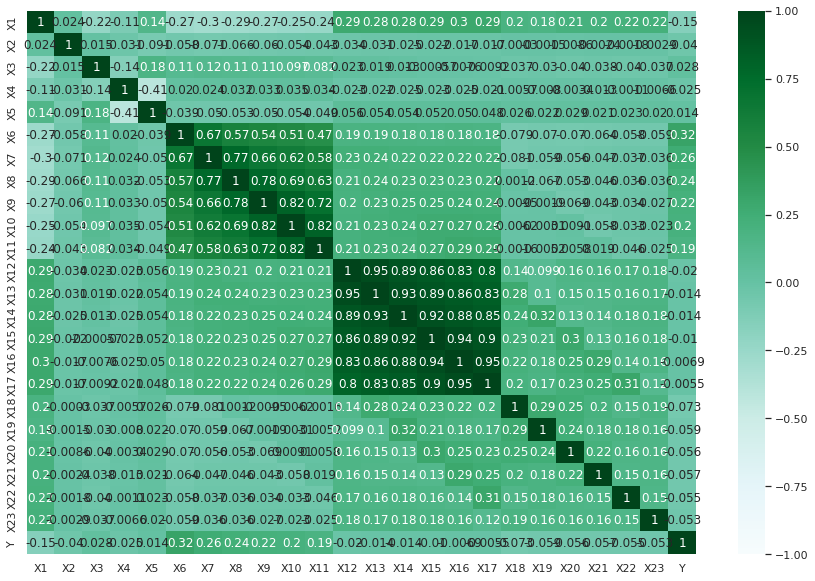

In [7]:
mat_corr = dfCreditosNro.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(mat_corr, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)

---
✅ **CONCLUSIONES PRELIMINARES:**

---
De acuerdo al análisis que arroja la gráfica de correlación podemos concluir que las variables X12 y X13, X13 y X14, X14 y X15, X15 y X16, y X16 y X17 tienen fuerte correlación, caso similar (pero en menor medida) a lo que ocurre con las variables X6 y X7, X7 y X8, X8 y X9, X9 y X10, y X10 y X11. Con el fin de que el ejercicio nos brinde herramientas de análisis manejables, seleccionaremos los atributos X5, X12, X13, X16 y  X17 para aplicar la técnica de preprocesamiento PCA. Pero antes, normalizaremos los datos para que podamos realizar un mejor análisis de los rangos y la varianza.

In [8]:
from sklearn.preprocessing import StandardScaler

var_normal_credit = StandardScaler()
normalizado_credit = var_normal_credit.fit_transform(dfCreditosNro)

dfCreditosNroEscalado=pd.DataFrame(normalizado_credit, columns=dfCreditosNro.columns)

dfCreditosNroEscalado.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,-1.137363,0.809689,0.185849,-1.057086,-1.246282,1.794642,1.782583,-0.696680,-0.666630,-1.530700,...,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,-0.296782,-0.308107,-0.314124,-0.293485,1.876689
1,-0.366561,0.809689,0.185849,0.858831,-1.029224,-0.874468,1.782583,0.139436,0.189241,0.235635,...,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,-0.240019,-0.244315,-0.314124,-0.181054,1.876689
2,-0.597802,0.809689,0.185849,0.858831,-0.160996,0.015235,0.111950,0.139436,0.189241,0.235635,...,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,-0.240019,-0.244315,-0.248702,-0.012407,-0.532853
3,-0.906122,0.809689,0.185849,-1.057086,0.164590,0.015235,0.111950,0.139436,0.189241,0.235635,...,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,-0.228667,-0.237936,-0.244188,-0.237269,-0.532853
4,-0.906122,-1.235043,0.185849,-1.057086,2.335161,-0.874468,0.111950,-0.696680,0.189241,0.235635,...,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,0.270850,0.266021,-0.269048,-0.255314,-0.532853


In [9]:
#Guardamos en la variable AtributosPCA las columnas a considerar en la técnica PCA
AtributosPCA = ["X5", "X12", "X13", "X16", "X17"]

MiResumen = {"Varianzas": dfCreditosNroEscalado[AtributosPCA].var()[0:5], "Rango Minimo": dfCreditosNroEscalado[AtributosPCA].min()[0:5], "Rango Máximo": dfCreditosNroEscalado[AtributosPCA].max()[0:5]}

#Almacenamos la información en un dataframe para mejor visualización
pd.DataFrame(MiResumen, index = AtributosPCA).transpose()

,X5,X12,X13,X16,X17
Varianzas,1.000033,1.000033,1.000033,1.000033,1.000033
Rango Minimo,-1.571867,-2.943086,-1.670797,-2.000207,-6.352483
Rango Máximo,4.722789,12.396047,13.126386,14.580173,15.487493


---
⚠ **APLICAR TÉCNICA PCA:**

---
Una vez normalizados los datos, procederemos a aplicar la técnica PCA a los atributos seleccionados del modelo.

In [10]:
from sklearn.decomposition import PCA

Componentes = PCA()

ComponentesResult = Componentes.fit_transform(dfCreditosNroEscalado)

ComponentesResult[:5]

array([[-1.80075257e+00, -1.27254697e+00, -5.88668173e-01,
        -3.97486234e-01, -1.02212350e-01, -1.60908785e+00,
         2.69738750e+00,  1.16763368e-01, -5.27318475e-01,
        -2.13737538e-01, -1.85834593e-01, -7.76028724e-02,
         2.29608840e+00, -9.00374365e-01, -3.12166809e-01,
        -1.39714869e-01,  4.03765201e-01, -2.68693492e-01,
        -8.85436715e-01,  5.89593276e-01, -4.57709806e-02,
         1.62799580e-02,  1.61306013e-02,  1.04888517e-02],
       [-6.70128172e-01, -2.40841090e+00,  1.04215858e+00,
        -3.56008646e-01,  3.04660115e-01, -9.70705163e-01,
         7.85497461e-01,  2.88934808e-01, -9.72988659e-02,
        -1.59360991e-01,  1.13127251e-01,  1.62825120e-01,
        -1.39269230e+00, -1.19997970e-01, -2.90577553e-01,
         6.44311226e-01,  2.11754351e+00,  2.02549954e-02,
        -2.59164244e-01,  8.30495785e-01, -1.24408054e-01,
         4.01697655e-03,  3.05488286e-03,  6.46900713e-03],
       [-8.57916353e-01, -9.71228390e-01,  4.71521931e

ℹ **NOTA:** Para que podamos comprender mejor los resultados del PCA aplicado anteriormente, obtendremos a continuación la varianza acumulada por cada componente obtenido.

In [11]:
ComponentesExplicadosDF = pd.DataFrame({'% Varianza del componente': np.round(Componentes.explained_variance_ratio_,4) * 100, '% Varianza acumulada': np.cumsum(Componentes.explained_variance_ratio_) * 100
})
ComponentesExplicadosDF

,% Varianza del componente,% Varianza acumulada
0,27.30,27.301007
1,17.50,44.806002
2,6.47,51.276642
3,6.14,57.421529
4,4.34,61.758495
5,4.06,65.817036
6,3.82,69.632496
7,3.78,73.412725
8,3.69,77.105833
9,3.63,80.736255




---


💡**Resultados:** Observamos que utilizando los primeros **13 componentes**, ya estaríamos obteniendo una varianza del **90%**, por lo cual estaríamos reduciendo casi a la mitad la carga de procesamiento del modelo.

---



---


👐Ahora debemos validar que una vez aplicada la técnica PCA no se haya presentado perdida de información, por lo cual, comparamos la varianza obtenida para las variables iniciales versus la varianza obtenida después de aplicar la técnica PCA.


---

In [12]:
dfCreditosNroEscaladoResult = pd.DataFrame(ComponentesResult)
print("Total varianza atributos iniciales: ", dfCreditosNroEscalado.var().sum())
print("Total varianza componentes PCA: ", dfCreditosNroEscaladoResult.var().sum())

Total varianza atributos iniciales:  24.000801148312583
Total varianza componentes PCA:  24.0008011483126


---


💡**Resultados:** Observamos que la varianza total de las variables iniciales (**24.000801148312583**) es técnicamente igual a la varianza total de los componentes generados (**24.0008011483126**) al aplicar PCA, por lo cual concluímos que no existe perdida de información.

---



---



## 👣 **Paso 2:** Interprete cada componente principal en términos de las variables originales;



---


---


👐Ahora queremos verificar cuales son los atributos que más contribuyen en los componentes seleccionados (en nuestro caso del 0 al 12).


---

In [ ]:
dfComponentesCredito = pd.DataFrame(Componentes.components_.round(4), columns = dfCreditosNroEscaladoResult.columns, index = dfCreditosNroEscalado.columns)
dfComponentesCredito.iloc[:,:13]

,0,1,2,3,4,5,6,7,8,9,10,11,12
X1,0.0656,-0.0220,0.0198,-0.0056,0.0140,0.1646,0.1973,0.2034,0.2100,0.2137,0.2089,0.3327,0.3441
X2,0.3117,0.0305,-0.0885,-0.0394,0.0628,-0.2967,-0.3280,-0.3349,-0.3344,-0.3212,-0.2958,0.1436,0.1441
X3,0.0100,0.0281,-0.3177,0.4676,-0.4777,-0.0207,0.0187,0.0638,0.0918,0.1118,0.1140,-0.1459,-0.1227
X4,0.0766,-0.0795,0.2268,-0.4291,0.4472,0.0204,0.0480,0.0798,0.1035,0.1098,0.1045,-0.1719,-0.1527
X5,-0.1982,0.7393,0.4512,-0.0270,-0.1394,-0.1113,-0.0519,-0.0025,0.0373,0.0549,0.0634,-0.0150,0.0078
X6,-0.2670,-0.6251,0.3911,0.2318,0.0047,-0.1340,-0.0613,-0.0165,0.0062,0.0171,0.0095,0.0117,0.0407
X7,-0.2615,0.0074,0.4091,0.1898,-0.1401,0.2181,0.0431,-0.0892,-0.1959,-0.2347,-0.2336,0.0300,0.0284
X8,0.0457,0.0752,-0.3156,-0.1201,0.0480,-0.0247,-0.0799,-0.0454,-0.0139,0.0424,0.0810,-0.0603,-0.0102
X9,-0.0267,-0.0480,0.0537,0.0104,0.0075,-0.0360,0.0050,-0.0079,-0.0146,0.0138,0.0937,-0.0246,-0.0805
X10,0.0227,0.0183,-0.1567,-0.0569,0.0476,-0.0328,-0.0340,-0.0110,0.0458,0.0564,0.0013,-0.0649,-0.0461


---


⚠ **PARA TENER EN CUENTA:** A continuación obtendremos la magnitud del valor absoluto del coeficiente, teniendo en cuenta que a mayor valor absoluto mayor será el peso del atributo en el cálculo del componente.


---

In [ ]:
dfComponentesCredito.iloc[:,:13].abs().idxmax()

0     X15
1      X5
2      X5
3     X14
4     X14
5     X16
6     X17
7     X19
8     X17
9     X20
10    X17
11    X18
12      Y
dtype: object

---
✅ **CONCLUSIÓN:**

---
Podemos concluir que el atributo X17 es el que más aporta según la selección de componentes realizada, ya que presenta el mayor peso en los componentes 6, 8 y 10. Seguido de los atributos X5 y X14.


---


---



## 👣 **Paso 3:** Identifique valores atípicos;



---


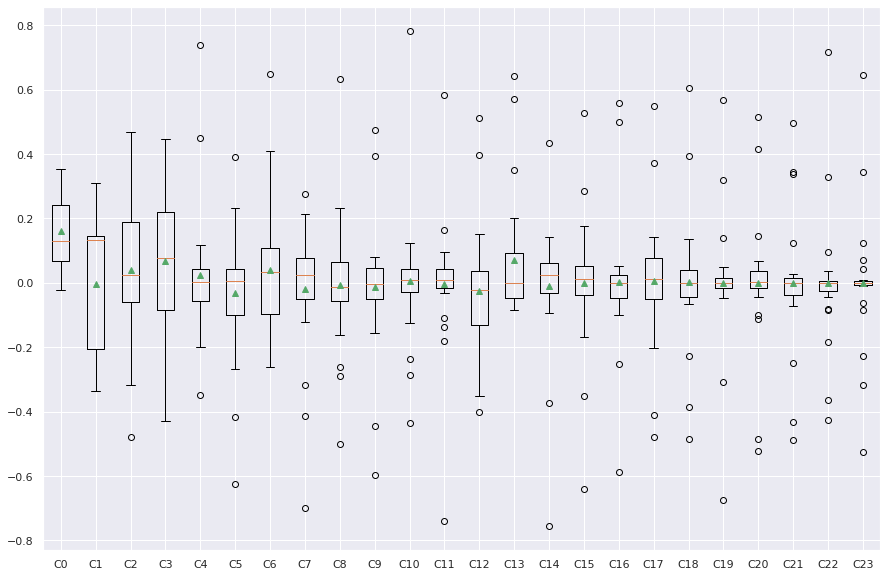

In [ ]:
import matplotlib.pyplot as plt

#Creamos una lista con los nombres de los 23 componentes para enviarlo a graficar junto con el dataframe
nombres=list()
nombres=[f'C{i}' for i in range(len(dfCreditosNroEscalado.columns))]

plt.boxplot(dfComponentesCredito, labels=nombres, showmeans=True)
plt.show()

---
✅ **CONCLUSIÓN:**

---
Analizando el boxplot concluímos que de los componentes seleccionados en el punto 2, que cubren el 90% de la varianza, solo los componentes C0, C1 y C3 no presentan valores atípicos, los componentes C2, C5, C6 y C9 presentan valores atípicos que consideramos manejables, mientras que los componentes C4, C7, C8, C10, C11 y C12 presentan outliers extremos que podrían interferir en las métricas de predicción requeridas por el modelo al hacer uso de los componentes mencionados.


---

---

#📑 **PARTE 2: RESPONDE LAS SIGUIENTES PREGUNTAS EN UNA CELDA DE TEXTO EN JUPYTER NOTEBOOK**

---

   

*   **¿Cuál es el número de componentes mínimo y por qué?**


En nuestro análisis determinamos los 13 componentes iniciales arrojados por la técnica PCA, ya que con estos estaríamos obteniendo una varianza del 90%, lo cual consideramos un valor aceptable dado que reduce la carga del modelo casi a la mitad, teniendo en cuenta los 23 atributos del conjunto de datos original.


*   **¿Cuál es la variación de los datos que representan esos componentes?**
  

Tal como lo comentamos en el punto anterior, con estos componentes estaríamos cubriendo el 90% de la variación.


*   **¿Cuál es la pérdida de información después de realizar PCA?**

Tecnicamente ninguna, ya que la diferencia entre la varianza total de las variables iniciales (**24.000801148312583**) y la varianza total de los componentes generados (**24.0008011483126**) al aplicar PCA es casi nula.


*   **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

Podemos concluir que el atributo **X17** es el que presenta mayor importancia en los componentes principales, ya que presenta el mayor peso en los componentes 6, 8 y 10. Los atributos que presentan menor importancia en los componentes principales son X15, X16, X18, X19 y X20.


*   **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

El uso de PCA se recomienda cuando existen muchas variables en el modelo y se detecta una alta correlación entre estas, adicionalmente cuando el tipo de atributo del conjunto de datos es en su mayor parte numérico. Teniendo en cuenta lo anterior, si no le damos manejo a la correlación mencionada podrían impactarse la varianza y el sesgo en las predicciones del modelo, por lo tanto, el principal beneficio de esta técnica es que podamos ajustar el modelo a partir de componentes no correlacionados, eliminando el ruido y pasando de requerimientos de computo para muchos atributos a utilizar solo los componentes principales requeridos en el procesamiento, lo cual se traduce en mejores tiempos de respuesta y requerimientos de computo menos complejos para los algoritmos de Machine Learning.